# Assessed Problem #3

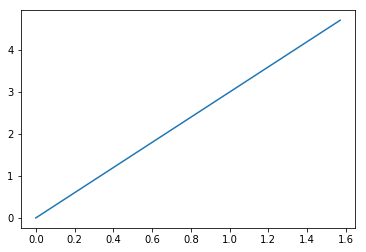

In [13]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
#

O = np.linspace(0,np.pi/2,100)
h = 3*O

plt.plot(O,h)
plt.show()